In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
#nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
#from xgboost import XGBClassifier
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("data/processed.csv")

In [77]:
df.head()

,flair,title,score,id,url,comms_num,created,body,author,word_count_body,word_count_title,avg_wlen_body,avg_wlen_title,corpus
0,AskIndia,"lost my job, sick mother and paralysed dad, in...",1037,g014wc,https://www.reddit.com/r/india/comments/g014wc...,131,2020-04-13 07:12:28,hi....it's really tough time for everyone. i r...,sanand_satwik,128,15,4.753846,4.400000,lost job sick mother paralysed dad lockdown ea...
1,AskIndia,why does the government come with a begging bo...,648,fxofyu,https://www.reddit.com/r/india/comments/fxofyu...,205,2020-04-09 21:34:21,"we have floods, terrorist attacks, famines due...",TWO-WHEELER-MAFIA,144,12,5.000000,4.833333,government come begging bowl every crisis we f...
2,AskIndia,mother's condition is going worse due to hepat...,755,g0zlly,https://www.reddit.com/r/india/comments/g0zlly...,94,2020-04-14 18:56:11,"hi folks, i really appreciate the warm respons...",sanand_satwik,290,14,4.780405,5.071429,mother condition going worse due hepatitis b l...
3,AskIndia,men who are 30+ and have decided not to get ma...,264,fvy95j,https://www.reddit.com/r/india/comments/fvy95j...,209,2020-04-07 02:26:25,the corona virus has given me some time to thi...,indianoogler,120,18,4.148760,3.666667,men 30 decided married plan old age the corona...
4,AskIndia,[please advice] reality punched me in the face...,428,g1lmhg,https://www.reddit.com/r/india/comments/g1lmhg...,85,2020-04-15 18:49:08,"sorry reddit, this post is going to be long. p...",throaway-forprivacy,644,9,4.208589,5.000000,please advice reality punched face today sorry...


Getting our text and labelling the flairs

In [78]:
X = df["corpus"]
Y = df["flair"]

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(Y)

Now splitting the data into training and testing sets, with a ratio of 75:25

In [79]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, labels, test_size = 0.25, random_state = 42)

# Modeling

In [85]:
'''
Function for training different classifier algorithms, on different types of processed data
provided to the function

This function also prints, in detail the evaluation results, followed by a fair comparison between
the performance of all the algorithms individually
'''
def train(X, Y, testx, ytest, data_form):
    
    acc = []
    f1 = []
    
    lr = LogisticRegression()
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
    svc = SVC()
    nb = MultinomialNB()
    mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
    
    models = {
              "LR": lr,
              "RF": rf, 
              "SVC": svc,
              "NB": nb,
              "MLP": mlp
             }
    
    for name in models.keys():
        clf = models[name]
        clf.fit(X,Y)
        
        preds = clf.predict(testx)
        
        print("Model: ", name)
        report = classification_report(ytest, preds, output_dict = True)
        print(classification_report(ytest, preds))
        
        acc.append(round(report["accuracy"], 2))
        f1.append(round(report["weighted avg"]["f1-score"], 2))
        
        pickle.dump(clf, open("models/" + data_form + name + ".pkl", "wb"))

    plt.figure(figsize = (16, 8))
    ax1 = plt.subplot(1, 1, 1)
    x = np.arange(len(models))
    w = 0.3
    plt.xticks(x, models.keys())
    accuracy = ax1.bar(x + w/2, acc, w,color = "red", align = "center")
    ax2 = ax1.twinx()
    f1score = ax2.bar(x - w/2, f1, w, color = "blue", align = "center")
    plt.title("Scores given by every model")
    plt.ylabel("Count")
    plt.legend([accuracy, f1score], ["Accuracy", "F1 Score"])
    plt.show()
    

Model:  LR
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        61
           1       0.46      0.45      0.45        58
           2       0.46      0.63      0.53        59
           3       0.54      0.56      0.55        63
           4       0.34      0.28      0.31        71
           5       0.75      0.72      0.74        54
           6       0.37      0.41      0.39        56
           7       0.35      0.56      0.43        52
           8       0.93      0.94      0.93        66
           9       0.57      0.36      0.44        69
          10       0.70      0.80      0.75        54
          11       0.50      0.26      0.34        58

    accuracy                           0.57       721
   macro avg       0.58      0.57      0.57       721
weighted avg       0.58      0.57      0.56       721

Model:  RF
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        61
  

C:\Users\azfar\Anaconda3\envs\atneva2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model:  MLP
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        61
           1       0.38      0.34      0.36        58
           2       0.48      0.51      0.50        59
           3       0.67      0.60      0.63        63
           4       0.25      0.32      0.28        71
           5       0.80      0.59      0.68        54
           6       0.41      0.50      0.45        56
           7       0.45      0.48      0.46        52
           8       0.93      0.94      0.93        66
           9       0.54      0.38      0.44        69
          10       0.64      0.76      0.69        54
          11       0.21      0.17      0.19        58

    accuracy                           0.54       721
   macro avg       0.55      0.54      0.54       721
weighted avg       0.55      0.54      0.54       721



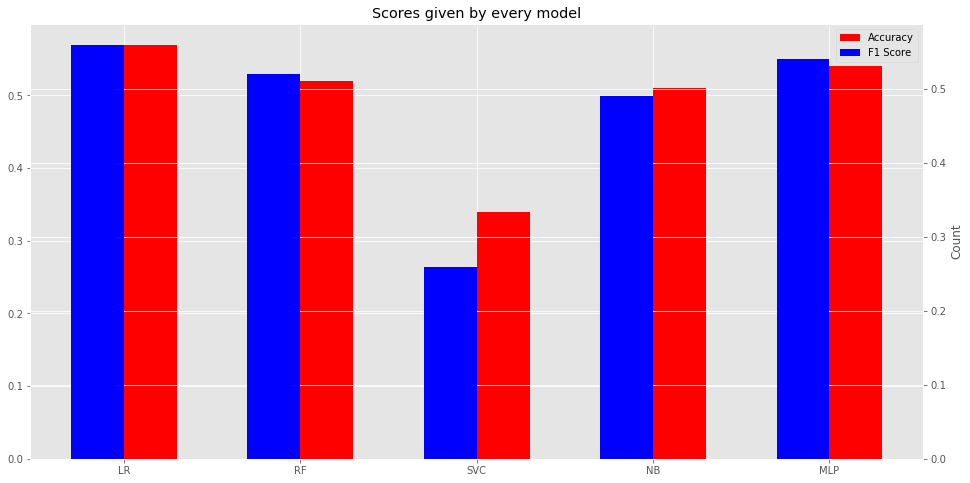

In [86]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')

trainx_cv = count_vect.fit_transform(Xtrain)
testx_cv = count_vect.transform(Xtest)

train(trainx_cv, Ytrain, testx_cv, Ytest, data_form = "countvectorizer")

Model:  LR
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        61
           1       0.38      0.60      0.47        58
           2       0.46      0.59      0.52        59
           3       0.61      0.52      0.56        63
           4       0.26      0.15      0.19        71
           5       0.80      0.69      0.74        54
           6       0.35      0.39      0.37        56
           7       0.40      0.60      0.48        52
           8       0.86      0.94      0.90        66
           9       0.60      0.45      0.51        69
          10       0.75      0.70      0.72        54
          11       0.38      0.19      0.25        58

    accuracy                           0.56       721
   macro avg       0.56      0.57      0.56       721
weighted avg       0.56      0.56      0.55       721

Model:  RF
              precision    recall  f1-score   support

           0       0.82      0.98      0.90        61
  

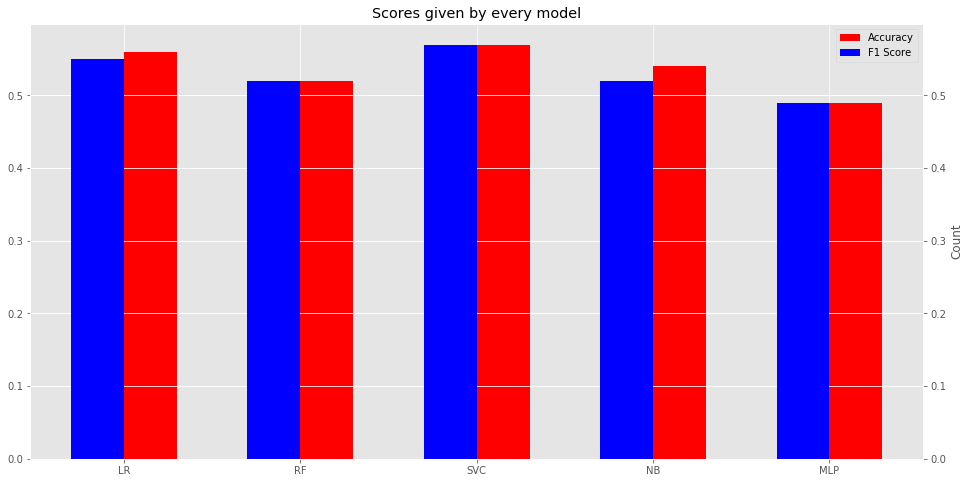

In [90]:
# TFIDF Vectors
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tf_xtrain_w = tfidf_vect.fit_transform(Xtrain)

tf_xtest_w =  tfidf_vect.transform(Xtest)
train(tf_xtrain_w, Ytrain, tf_xtest_w, Ytest, "tf_word")

Model:  LR
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        61
           1       0.37      0.41      0.39        58
           2       0.53      0.34      0.41        59
           3       0.14      0.68      0.23        63
           4       0.32      0.10      0.15        71
           5       0.75      0.28      0.41        54
           6       0.25      0.16      0.20        56
           7       0.41      0.29      0.34        52
           8       0.86      0.94      0.90        66
           9       0.44      0.16      0.23        69
          10       0.73      0.20      0.32        54
          11       0.11      0.03      0.05        58

    accuracy                           0.37       721
   macro avg       0.48      0.37      0.37       721
weighted avg       0.47      0.37      0.37       721

Model:  RF
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        61
  

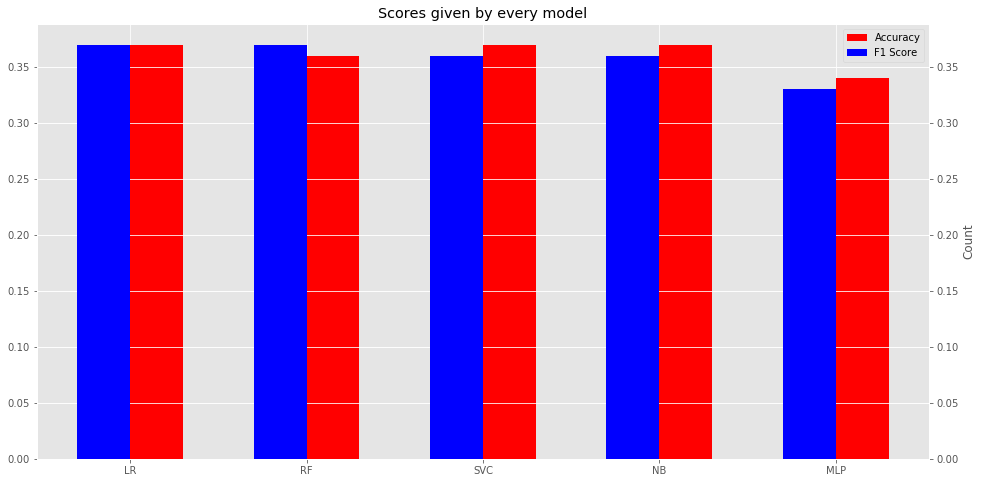

In [91]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tf_xtrain_w = tfidf_vect.fit_transform(Xtrain)

tf_xtest_w =  tfidf_vect.transform(Xtest)
train(tf_xtrain_w, Ytrain, tf_xtest_w, Ytest, "tf_ngram")

Model:  LR
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        61
           1       0.43      0.71      0.53        58
           2       0.42      0.58      0.49        59
           3       0.61      0.52      0.56        63
           4       0.46      0.24      0.31        71
           5       0.58      0.74      0.65        54
           6       0.36      0.41      0.38        56
           7       0.41      0.50      0.45        52
           8       0.87      0.94      0.91        66
           9       0.50      0.30      0.38        69
          10       0.65      0.69      0.67        54
          11       0.38      0.16      0.22        58

    accuracy                           0.55       721
   macro avg       0.54      0.56      0.54       721
weighted avg       0.55      0.55      0.53       721

Model:  RF
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        61
  

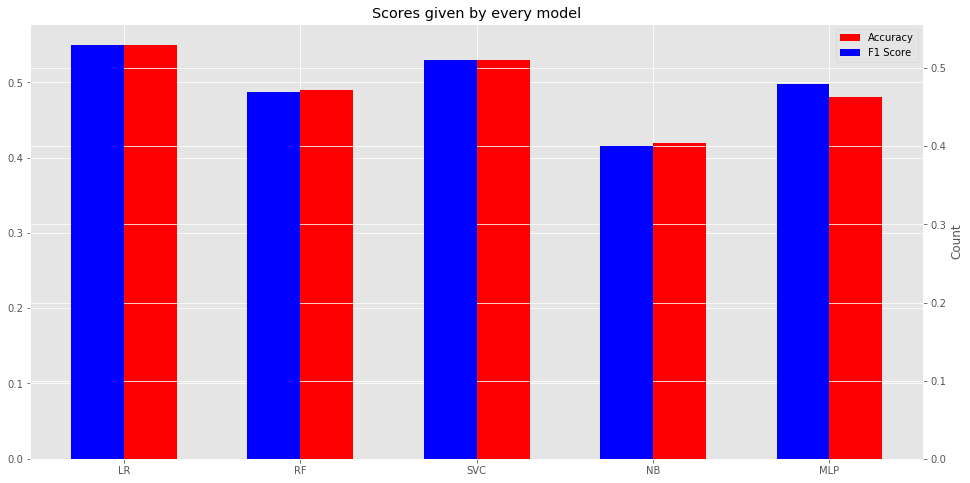

In [92]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tf_xtrain_w = tfidf_vect.fit_transform(Xtrain)

tf_xtest_w =  tfidf_vect.transform(Xtest)
train(tf_xtrain_w, Ytrain, tf_xtest_w, Ytest, "tf_ngram_char")

Model:  LR
              precision    recall  f1-score   support

           0       0.45      0.62      0.52        61
           1       0.30      0.78      0.43        58
           2       0.33      0.31      0.32        59
           3       0.16      0.08      0.11        63
           4       0.00      0.00      0.00        71
           5       0.53      0.54      0.53        54
           6       0.25      0.29      0.27        56
           7       0.14      0.27      0.19        52
           8       0.67      0.94      0.78        66
           9       0.15      0.09      0.11        69
          10       0.22      0.09      0.13        54
          11       0.09      0.03      0.05        58

    accuracy                           0.33       721
   macro avg       0.27      0.34      0.29       721
weighted avg       0.27      0.33      0.28       721

Model:  RF
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        61
  

C:\Users\azfar\Anaconda3\envs\atneva2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\azfar\Anaconda3\envs\atneva2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model:  MLP
              precision    recall  f1-score   support

           0       0.47      0.64      0.54        61
           1       0.27      0.55      0.36        58
           2       0.31      0.29      0.30        59
           3       0.24      0.16      0.19        63
           4       0.27      0.08      0.13        71
           5       0.50      0.57      0.53        54
           6       0.23      0.32      0.27        56
           7       0.12      0.17      0.14        52
           8       0.81      0.95      0.88        66
           9       0.15      0.09      0.11        69
          10       0.22      0.19      0.20        54
          11       0.00      0.00      0.00        58

    accuracy                           0.33       721
   macro avg       0.30      0.33      0.30       721
weighted avg       0.30      0.33      0.31       721



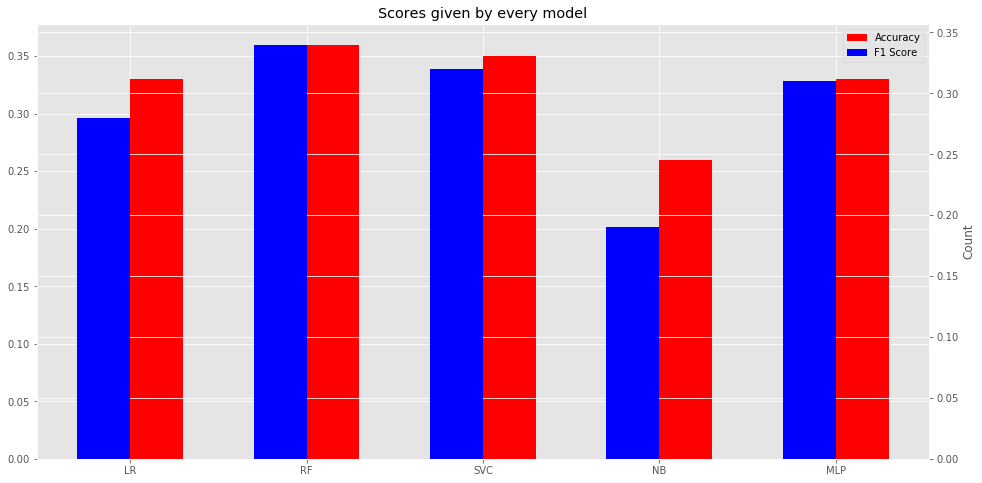

In [93]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', max_features=5000)
tf_xtrain_w = tfidf_vect.fit_transform(Xtrain)

tf_xtest_w =  tfidf_vect.transform(Xtest)
train(tf_xtrain_w, Ytrain, tf_xtest_w, Ytest, "tf_char")

**One final step to the preprocessing of the cleaned text: Lemmatiztion**
Here, we convert each an every work to their root word

In [15]:
lemmatizer = WordNetLemmatizer() 

df["lemmatized"] = X.apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in x.split(" ")]))